<a href="https://colab.research.google.com/github/VMVoron/ITMO/blob/main/Prob_Theory_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа #1. Вариант 4




## Задача 1

В урне 10 белых шаров и 5 синих. Вынули три шара. Какова вероятность того, что все они одного цвета

*Решение*

Если все шары одного цвета, то они могут быть либо тремя синими, либо тремя красными.
Вероятность того, что все они одного цвета $$\mathsf P_о = P_{c_1c_2c_3} + P_{к_1к_2к_3} = P_A + P_B $$



$$\mathsf P_A = P_{c_1c_2c_3} =  P(c_1)* P(c_2|c_1) * P(c_3|c_2  c_1) = \dfrac {5}{15} * \dfrac{4}{14} * \dfrac{3}{13} =  \dfrac{60}{2730} = \dfrac{6}{273} $$
$$\mathsf P_B =  P_{б_1б_2б_3} =  P(б_1)* P(б_2|б_1) * P(б_3|б_2  б_1) = \dfrac{10}{15} * \dfrac{9}{14} * \dfrac{8}{13} = \dfrac{720}{2730} = \dfrac{72}{273} $$

$$\mathsf P_o =  P_A + P_B =  \dfrac{6}{273}+  \dfrac {72}{273} = \dfrac{78}{273} = 0.2857142857142857 ≈ 0.286 $$

In [ ]:
balls = ['white' for x in range(10)] + ['blue' for x in range(5)]

In [ ]:
print(balls)

['white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'blue', 'blue', 'blue', 'blue', 'blue']


In [ ]:
import random
from tqdm.notebook import tqdm

k = 3
n = 100000

success = 0

for _ in tqdm(range(n)):
  balls = ['white' for x in range(10)] + ['blue' for x in range(5)]
  blue = 0
  white = 0
  for ball in range(k):
    number = random.randint(0, len(balls)-1)
    #print(number, balls[number])
    if balls[number] == 'blue':
      blue += 1
    else:
      white += 1
    balls.pop(number)
    #print(balls)
  if (white == 3) or (blue == 3):
    success += 1
    #print('success')
    blue = 0
    white = 0

per = success / n
r = round(per, 3)
print(r)

  0%|          | 0/100000 [00:00<?, ?it/s]

0.286


## Задача 2

Последовательно посланы 4 сигнала. Вероятность приема каждого из них не зависит от того, приняты ли остальные сигналы и соответственно равна 0.2, 0.3, 0.4, 0.5. Определите вероятность приема трех сигналов и вероятность приема хотя бы одного сигнала.

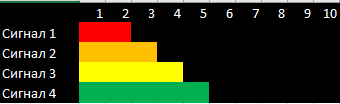

Найдем число сочетаний, при которых мы получим 3 сигнала.
$$\mathsf C^{k}_{n}= \dfrac {n!}{(n-k)! *k!} $$
$$\mathsf C^{3}_{4} = \dfrac {4!}{3!(4-3)!} = \dfrac{4!}{3!}= 4 $$

4 варианта

$$\mathsf P_{3 сигнала} = P_1 + P_2 + P_3 + P_4 $$

Пусть s - success, f - fail, нижний индекс - номер сигнала <br>
Перечислим все варианты

$$\mathsf P_1 = s_1 s_2 s_3 f_4  = 0.2 * 0.3 * 0.4 * (1-0.5) = 0.012 $$
$$\mathsf P_2 = s_1 s_2 f_3 s_4 = 0.2 * 0.3 * (1-0.4) * 0.5 = 0.018 $$
$$\mathsf P_3 = s_1 f_2 s_3 s_4 = 0.2 * (1-0.3) * 0.4 * 0.5 ≈ 0.028 $$
$$\mathsf P_4 = f_1 s_2 s_3 s_4 = (1-0.2) * 0.3 * 0.4 * 0.5 = 0.048 $$

$$\mathsf P_{3 сигнала} = P_1 + P_2 + P_3 + P_4 ≈ 0.012 + 0.018 + 0.028 + 0.048 = 0.106 $$

In [ ]:
0.012 + 0.018 + 0.028 + 0.048

0.106

Вероятность приема хотя бы одного сигнала = 1 - (вероятность того, что ни один сигнал не принят)

$$\mathsf P_{хотя бы 1 сигнал} = 1 - (f_1 f_2 f_3 f_4) = 1 - (0.8*0.7*0.6*0.5) ≈ 1 - 0.168 = 0.832 $$

In [ ]:
1 - ((1-0.2) * (1-0.3) * (1-0.4) * (1-0.5) )

0.8320000000000001

In [ ]:
import random

def generate_signal(probability):
    if random.random() < probability:
        return 1 # сигнал успешно принят
    else:
        return 0 # сигнал не принят

signal_probabilities = [0.2, 0.3, 0.4, 0.5] # вероятность успешной передачи сигнала

at_least_1 = 0
equal_3 = 0
sum = 0
n = 100000
for _ in tqdm(range(n)):
  for prob in signal_probabilities:
    result = generate_signal(prob)
    if result == 1:
        sum += 1
    else:
        pass
  if sum >=1:
    at_least_1 += 1
    if sum == 3:
      equal_3 += 1
  else:
    pass
  sum = 0

print('По меньшей мере принят 1 сигнал:', at_least_1/n)
print('Принято ровно 3 сигнала:', equal_3/n)

  0%|          | 0/100000 [00:00<?, ?it/s]

По меньшей мере принят 1 сигнал: 0.83262
Принято ровно 3 сигнала: 0.106


## Задача 3

Стрельба производится по пяти мишеням типа А, трем – типа В и двум – типа С. Вероятности попадания в мишени типа А, В, С, равны 0.4, 0.1, 0.15 соответственно. Найти вероятность поражения цели при одном выстреле, если неизвестно, в мишень какого типа он будет сделан

Всего 10 мишеней.

$$\mathsf P = 0.5 * 0.4 + 0.3 * 0.1 + 0.2 * 0.15 = 0.26 $$

In [ ]:
0.5 * 0.4 + 0.3 * 0.1 + 0.2 * 0.15

0.26

In [ ]:
goals = ['A' for x in range(5)] + ['B' for x in range(3)] + ['C' for x in range(2)]
sum = 0
n = 100000
for _ in tqdm(range(n)):
  for g in range(1):
      number = random.randint(0, len(goals)-1)
      #print(number, balls[number])
      if goals[number] == 'A':
        prob = 0.4
      elif goals[number] == 'B':
        prob = 0.1
      else:
        prob = 0.15

      result = generate_signal(prob)
      if result == 1:
          sum += 1
      else:
          pass
print('Вероятность попадания в мишень:', sum/n)

  0%|          | 0/100000 [00:00<?, ?it/s]

Вероятность попадания в мишень: 0.25971


## Задача 4

Два парохода должны подойти к одному и тому же причалу независимо друг от друга и равновозможно в течение суток. Определите вероятность того, что одному из них придется ожидать освобождения причала,если время стоянки первого парохода 1 час, а второго - 2 часа

In [ ]:
from math import sqrt
1/2*(sqrt(1058)+sqrt(1152))*sqrt(2)

47.0

In [ ]:
24*24

576

In [ ]:
47/576

0.08159722222222222

In [ ]:
1/24

0.041666666666666664

In [ ]:
tr1 = (1/2)*(sqrt(1058)+sqrt(1152))*sqrt(2)
tr2 = (1/2)*(sqrt(1152)+sqrt(968))*sqrt(8)
print(tr1, tr2)
six = tr1+tr2

47.0 92.0


In [ ]:
sq = 24**2
print(six/sq)

0.24131944444444445


In [ ]:
import datetime
import random
sum = 0
n = 100000
for _ in tqdm(range(n)):
  # Генерируем случайные часы и минуты для пароходов
  hours1 = random.randint(0, 23)
  minutes1 = random.randint(0, 59)
  hours2 = random.randint(0, 23)
  minutes2 = random.randint(0, 59)

  # Создаем объекты времени для двух пароходов
  time1 = datetime.time(hours1, minutes1)
  time2 = datetime.time(hours2, minutes2)

  # Получаем текущую дату
  current_date = datetime.date.today()

  # Создаем объекты полной даты для двух пароходов
  datetime1 = datetime.datetime.combine(current_date, time1)
  datetime2 = datetime.datetime.combine(current_date, time2)
  #print(datetime1, datetime2,"Разница во времени между двумя пароходами:", h , "ч", (time_difference - (h*3600))//60, 'мин')

  if datetime1 <= datetime2:
    time_difference = (datetime2 - datetime1).total_seconds()
    #print(time_difference)
    if time_difference < 3600:
      sum += 1



  else:
    time_difference = (datetime1 - datetime2).total_seconds()
    #print(time_difference)
    if time_difference < 7200:
      sum += 1



print('Вероятность, что одному из пароходов придётся ждать', sum/n)





  0%|          | 0/100000 [00:00<?, ?it/s]

Вероятность, что одному из пароходов придётся ждать 0.12152
